<a href="https://colab.research.google.com/github/FaQ2108/Academics-Data-Projects/blob/main/IntAlMachLearn4_MauroFacundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Debemos describir brevemente la información que nos entrega la base de datos.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd

# Cargamos la base de datos del iris
iris = datasets.load_iris()

# Creamos un DataFrame con los datos del iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target


# Describimos de la base de datos
descripcion = iris_df.describe()
print(descripcion)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [11]:
# Mostramos las primeras filas del DataFrame
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


## 2. Ahora, debemos graficar las relaciones con las cuales buscaremos realizar
el agrupamiento de clusters (por ejemplo, largo del sépalo versus ancho del
sépalo).

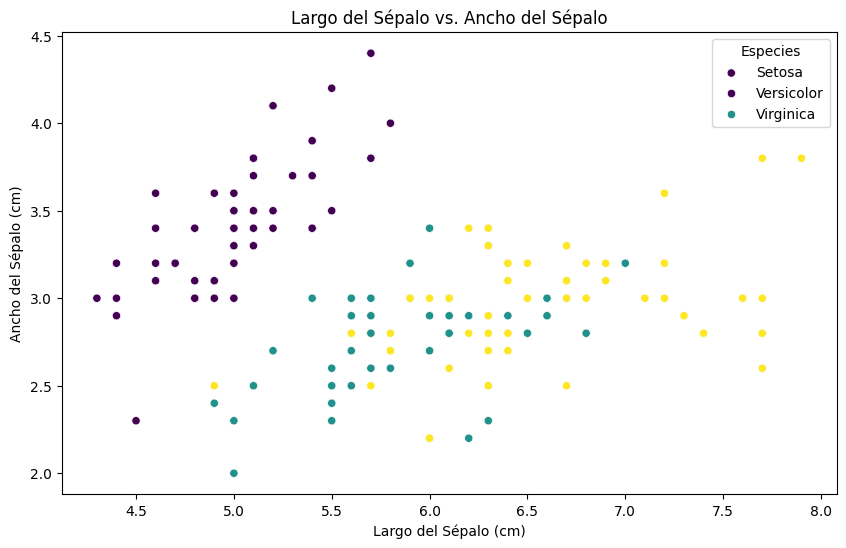

In [12]:
# Graficamos largo del sépalo vs. ancho del sépalo
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], hue=iris_df['species'], palette='viridis')
plt.title('Largo del Sépalo vs. Ancho del Sépalo')
plt.xlabel('Largo del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')
plt.legend(title='Especies', loc='upper right', labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()

## 3. Lo siguiente es entrenar el modelo y determinar los centros de cada cluster,
su inercia y etiqueta.

In [14]:
# Entrenamos el modelo K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_df)

# Obtenemos los centros de cada cluster
centros = kmeans.cluster_centers_
print("Centros de los clusters:")
print(centros)

Centros de los clusters:
[[6.624 2.984 5.562 2.026 1.98 ]
 [5.006 3.428 1.462 0.246 0.   ]
 [5.9   2.76  4.25  1.326 1.02 ]]


In [15]:
# Obtenemos la inercia del modelo
inercia = kmeans.inertia_
print("Inercia del modelo:")
print(inercia)

Inercia del modelo:
87.26460000000003


In [16]:
# Obtenemos las etiquetas de cada punto de datos
etiquetas = kmeans.labels_
print("Etiquetas de los datos:")
print(etiquetas)

Etiquetas de los datos:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


## 4. Debemos, además, graficar los clusters.

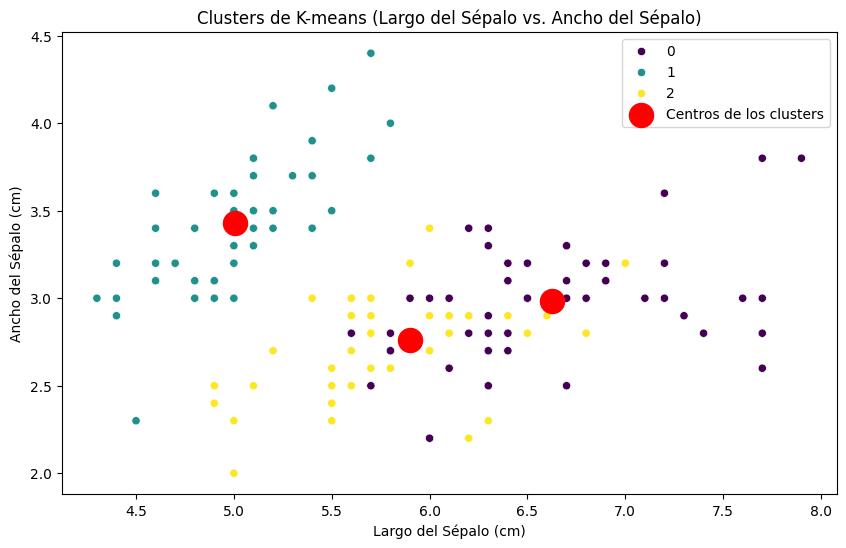

In [20]:
# Obtenemos las etiquetas de clúster para cada punto de datos
labels = kmeans.labels_

# Agregamos las etiquetas de clúster al DataFrame como una nueva columna llamada 'cluster'
iris_df['cluster'] = labels

# Graficamos los clústeres usando la nueva columna 'cluster'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], hue=iris_df['cluster'], palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centros de los clusters')
plt.title('Clusters de K-means (Largo del Sépalo vs. Ancho del Sépalo)')
plt.xlabel('Largo del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')
plt.legend()
plt.show()

Nuestro grafico muestra una cierta separación entre los clusters, aunque hay algo de superposición entre algunos de ellos. Esto indica que, si bien K-means ha encontrado grupos con características similares, hay algunas flores de iris que comparten características con más de un cluster.

## 5. Por último, mediante el método del codo, determinemos cuál es el número
de clusters ideales para realizar la agrupación

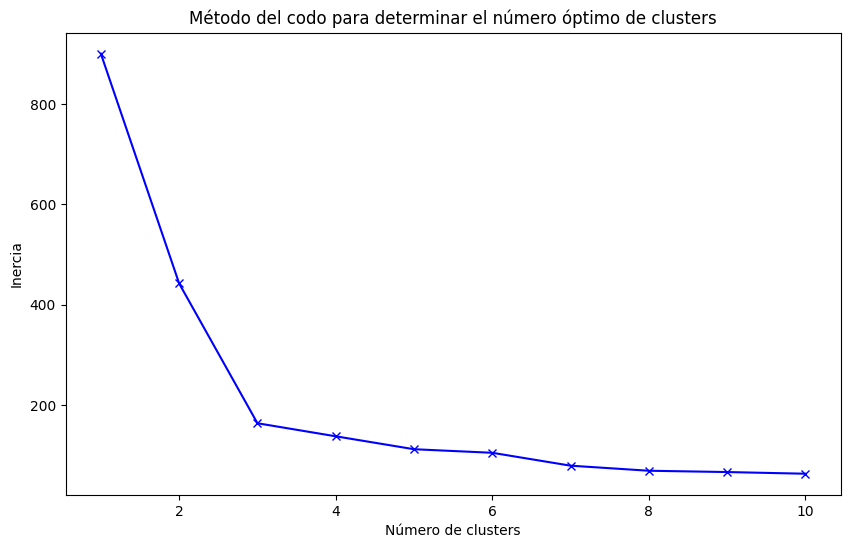

In [21]:
# Escalamos datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

# Calculamos la inercia para diferentes números de clusters
inercia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_scaled)
    inercia.append(kmeans.inertia_)

# Graficamos el método del codo
plt.figure(figsize=(10, 6))
plt.plot(K, inercia, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()

El método del codo busca un equilibrio entre minimizar la inercia y evitar un número excesivo de clusters. El "codo" representa el punto donde agregar más clusters no proporciona una reducción significativa en la inercia.

En nuestrol grafico del codo parece haber un cambio de pendiente alrededor de k=3. Esto sugiere que 3 podría ser un buen número de clusters para nuestro dataset.